In [1]:
from oldPeopleSim import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

/Users/nicholaskhorasani/Library/Python/3.9/lib/python/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:

opinions = bimodal_opinions(
    num_agents=200,
    mean1=-0.5,
    mean2=0.5,
    std_dev1=0.1,
    std_dev2=0.1,
    lower_bound=-10,
    upper_bound=10,
    proportion_first_mode=0.5 )

# opinions = normal_opinions(
#     num_agents=1000,
#     mean=0,
#     std_dev=0.25,
#     lower_bound=-1,
#     upper_bound=1
# )

# opinions = trimodal_opinions(mean1=-0.5, mean2=0, mean3=0.5, std_dev=0.1, num_agents=1000, lower_bound=-1, upper_bound=1)


# steps = [(-0.6, 250), (0, 500), (0.6, 250)]  # Mean opinion and size for each step
# num_agents = 1000
# lower_bound = -1
# upper_bound = 1

# opinions = step_opinions(steps, num_agents, lower_bound, upper_bound)

# start = 0  # Starting point of the random walk in the middle of the opinion space
# num_agents = 1000
# step_size = 0.1  # Determines how much each step in the random walk can change

# opinions = random_walk_opinions(start, num_agents, step_size)

agents = generate_agents(opinions, total_connections_per_agent=10, percent_same_team=0.56)


200
num_same_team_connections: 5
num_opposite_team_connections: 5


In [3]:
opinions = [agent.opinions[0] for agent in agents.values()]
len(opinions)

200

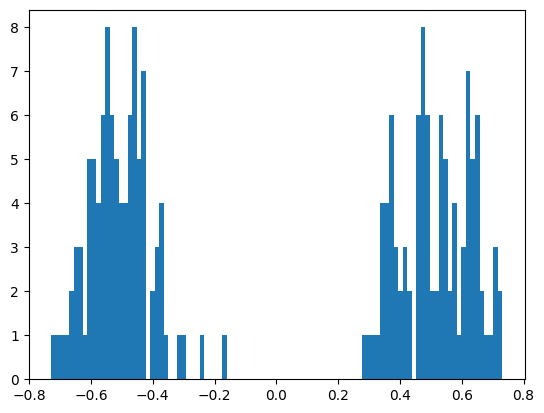

In [4]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [5]:
agents = sim(agents, 1000, numIterationsToUpdate=10, lookBackDistance=None)

iteration: 0
percentage of agents with stable strategies: 0.0%
iteration time: 0.006227970123291016 seconds
iteration: 500
percentage of agents with stable strategies: 10.5%
iteration time: 102.70474481582642 seconds
iteration: 999
percentage of agents with stable strategies: 10.5%


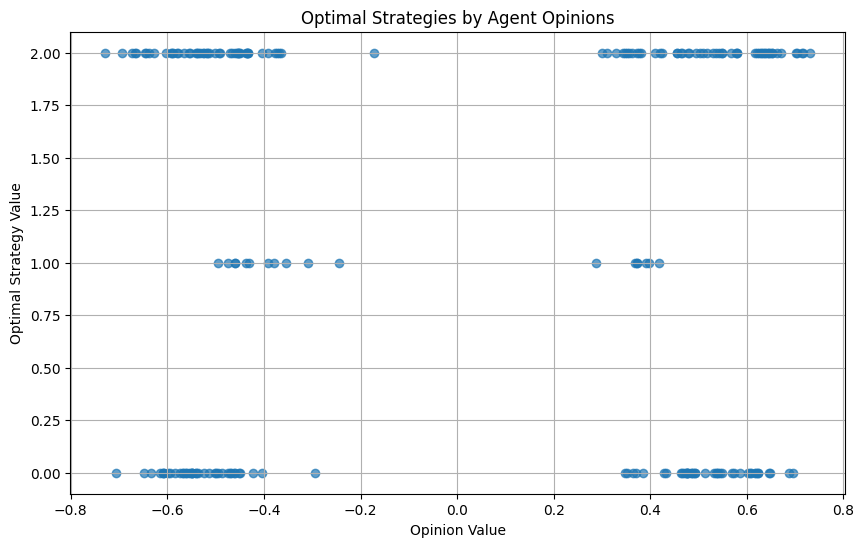

In [6]:
import matplotlib.pyplot as plt

# Assuming 'agents' is a list of agent instances, and each agent has 'opinion' attribute and a method 'get_optimal_strategy()'
# which returns the optimal strategy value for the agent.

opinion_values = [agent.opinions[0] for agent in agents.values()]  # Gather all opinion values
optimal_strategies = [agent.currentStrategy.value for agent in agents.values()]  # Gather all optimal strategy values

plt.figure(figsize=(10, 6))
plt.scatter(opinion_values, optimal_strategies, alpha=0.7)  # Plot each point with some transparency

plt.title('Optimal Strategies by Agent Opinions')
plt.xlabel('Opinion Value')
plt.ylabel('Optimal Strategy Value')
plt.grid(True)

# Optionally, add a color bar if you've assigned different colors to points based on another variable
# plt.colorbar()

plt.show()

In [7]:
print(f"Num Agents Playing Low Tolerance: {optimal_strategies.count(0)}")
print(f"Num Agents Playing Medium Tolerance: {optimal_strategies.count(1)}")
print(f"Num Agents Playing High Tolerance: {optimal_strategies.count(2)}")

percent_low = optimal_strategies.count(0) / len(optimal_strategies) * 100
percent_med = optimal_strategies.count(1) / len(optimal_strategies) * 100
percent_high = optimal_strategies.count(2) / len(optimal_strategies) * 100

print(f"Percent Agents Playing Low Tolerance: {percent_low}%")
print(f"Percent Agents Playing Medium Tolerance: {percent_med}%")
print(f"Percent Agents Playing High Tolerance: {percent_high}%")

Num Agents Playing Low Tolerance: 80
Num Agents Playing Medium Tolerance: 18
Num Agents Playing High Tolerance: 102
Percent Agents Playing Low Tolerance: 40.0%
Percent Agents Playing Medium Tolerance: 9.0%
Percent Agents Playing High Tolerance: 51.0%


Agent 1: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]


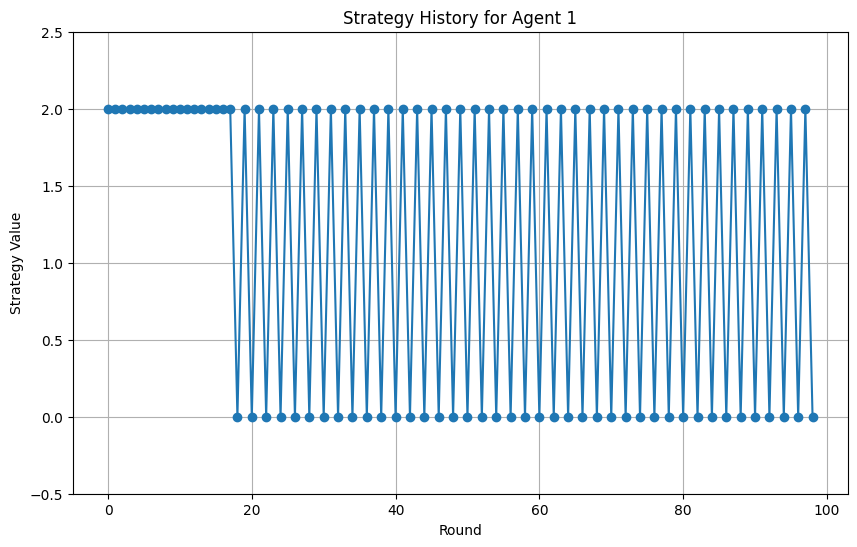

Agent 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2]


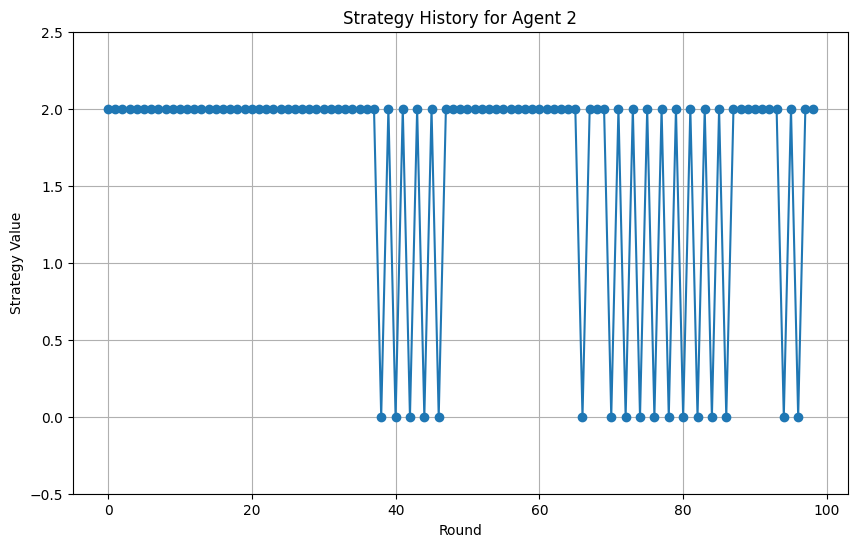

Agent 3: [1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]


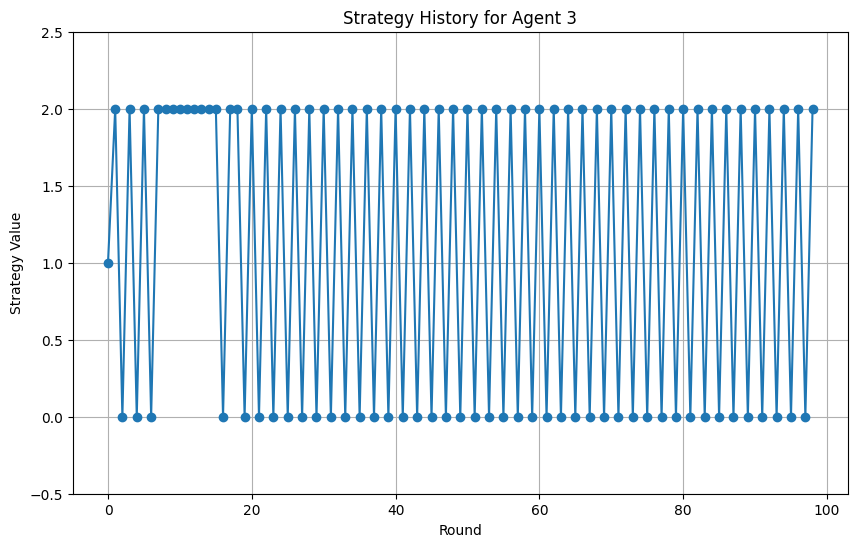

Agent 4: [2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


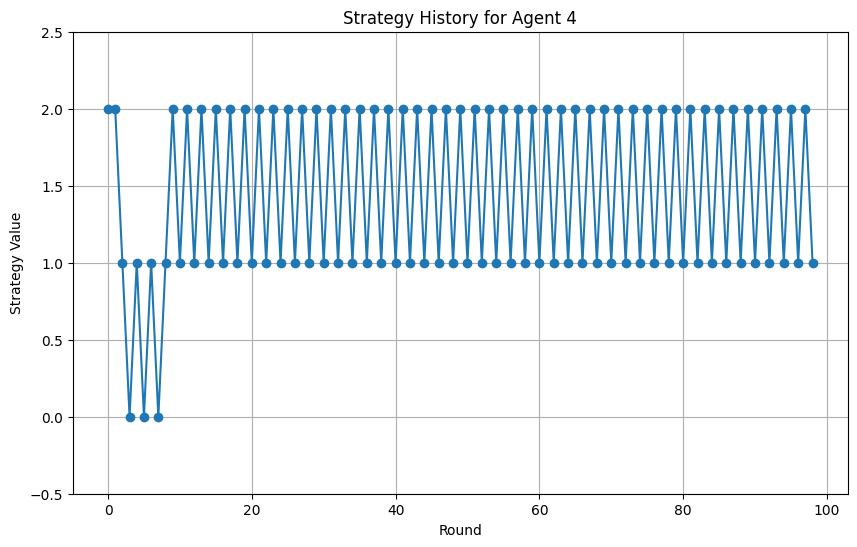

Agent 5: [2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]


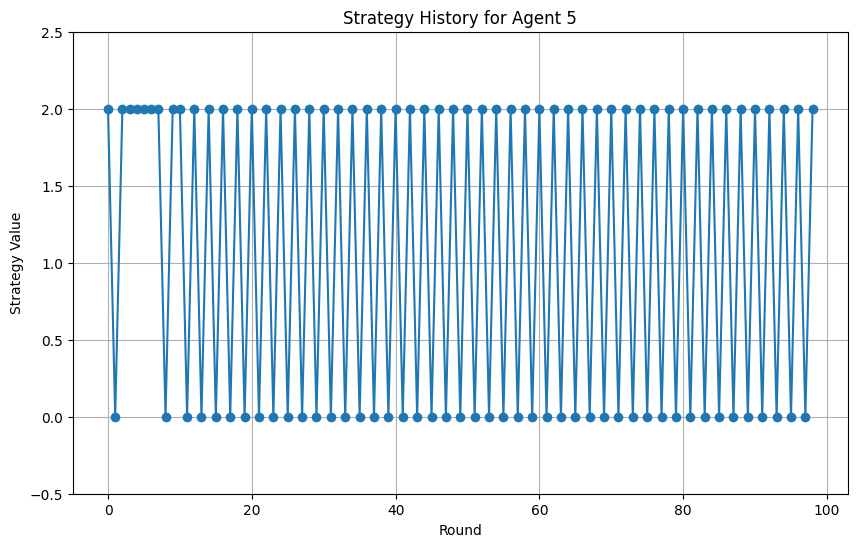

Agent 6: [0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]


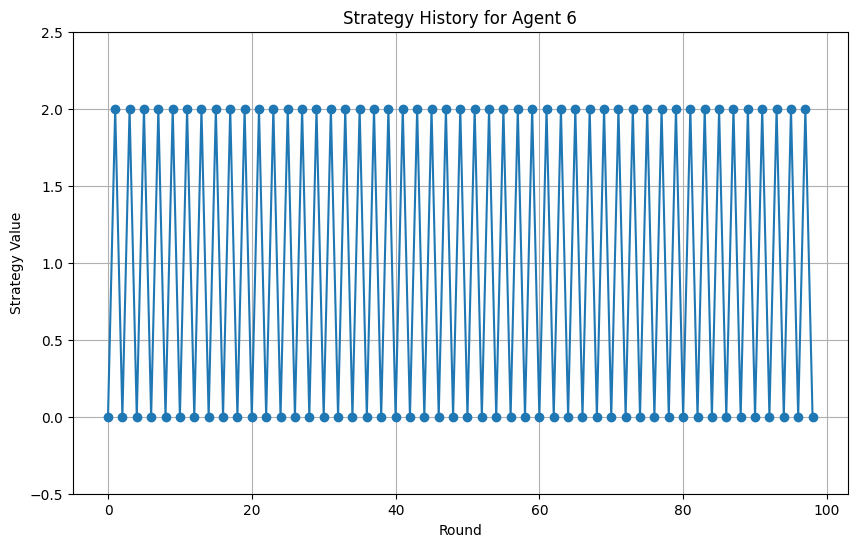

Agent 7: [1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]


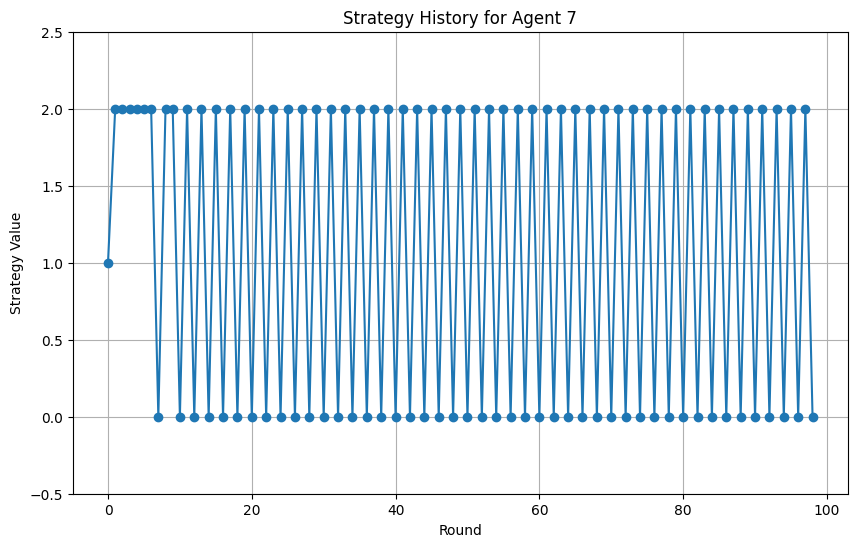

In [8]:
import matplotlib.pyplot as plt

# Assuming 'agents' is a list of agent instances with a get_strategy_history method

# First, find the global min and max strategy values across all agents
all_strat_values = []
for agent in agents.values():
    # print(agent)
    strat_history = agent.get_strategy_history()
    strat_history_values = [strat.value for strat in strat_history]
    all_strat_values.extend(strat_history_values)

global_min = min(all_strat_values)
global_max = max(all_strat_values)

# Then, plot each agent's strategy history with the same y-axis limits
for i, agent in enumerate(agents.values()):
    strat_history = agent.get_strategy_history()
    strat_history_values = [strat.value for strat in strat_history]
    # 
    # Printing strategy history values
    print(f"Agent {i+1}: {strat_history_values}")
    
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(strat_history_values, marker='o', linestyle='-')  # Plotting with lines and markers
    
    plt.title(f'Strategy History for Agent {i+1}')
    plt.xlabel('Round')
    plt.ylabel('Strategy Value')
    plt.ylim(global_min - 0.5, global_max + 0.5)  # Set y-axis limits with a little padding
    plt.grid(True)
    
    plt.show()
    if i > 5:
        break


In [9]:

stable_team1 = np.array([agent.opinions[0] for agent in agents.values() if agent.is_strategy_stable() and agent.team == 1])
unstable = np.array([agent.opinions[0] for agent in agents.values() if not agent.is_strategy_stable() and agent.team == 1])

print(f"stable: {stable_team1.mean()}  unstable: {unstable.mean()}")
print(f"stable: {len(stable_team1)}  unstable: {len(unstable)}")

stable: 0.6652537055535023  unstable: 0.5010358048664305
stable: 8  unstable: 92


In [10]:
strategy_colors = {
    Tolerance.LOW: 'blue',  # Strategy 0 -> Blue
    Tolerance.MEDIUM: 'green', # Strategy 1 -> Green
    Tolerance.HIGH: 'red'    # Strategy 2 -> Red
}
def get_edges(agents):
    edges = []
    for agent_id, agent in agents.items():
        for connected_agent_id in agent.connected_agents:
            if (agent_id, connected_agent_id) not in edges:
                edges.append((agent_id, connected_agent_id))
    return edges

def get_positions(agents):
    # Assign node positions: x based on actual opinion, y can be random or based on another attribute
    positions = {}
    # y_values = np.random.rand(len(agents))  # Random y-coordinates for vertical spreading
    for i, (agent_id, agent) in enumerate(agents.items()):
        x = agent.opinions[0]  # x-coordinate based on actual opinion
        y = agent.currentStrategy.value + int(agent.is_strategy_stable())/2  # y-coordinate based on strategy value
        # y = y_values[i]  # y-coordinate is randomly assigned
        positions[agent_id] = (x, y)
    return positions

def get_strategy_colors(node_list):
    strategy_colors = {
        Tolerance.LOW: 'blue',  # Strategy 0 -> Blue
        Tolerance.MEDIUM: 'green', # Strategy 1 -> Green
        Tolerance.HIGH: 'red'    # Strategy 2 -> Red
    }
    colors = [strategy_colors[agents[agent_id].currentStrategy] for agent_id in node_list]
    return colors


def get_stability_colors(agents):
    stable_colors = {
        True: 'blue',
        False: 'gray'
    }
    return [stable_colors[agent.is_strategy_stable()] for agent_id, agent in agents.items()]

def get_edge_color(agent1_id, agent2_id, agents):
    # Example logic: Color edge based on the strategy of the first node in the edge
    strategy = agents[agent1_id].currentStrategy
    if strategy == Tolerance.LOW:
        return 'white'
    elif strategy == Tolerance.MEDIUM:
        return 'green'
    elif strategy == Tolerance.HIGH:
        return 'white'
    else:
        # return 'grey'  # Default color if strategy does not match
        return 'purple'

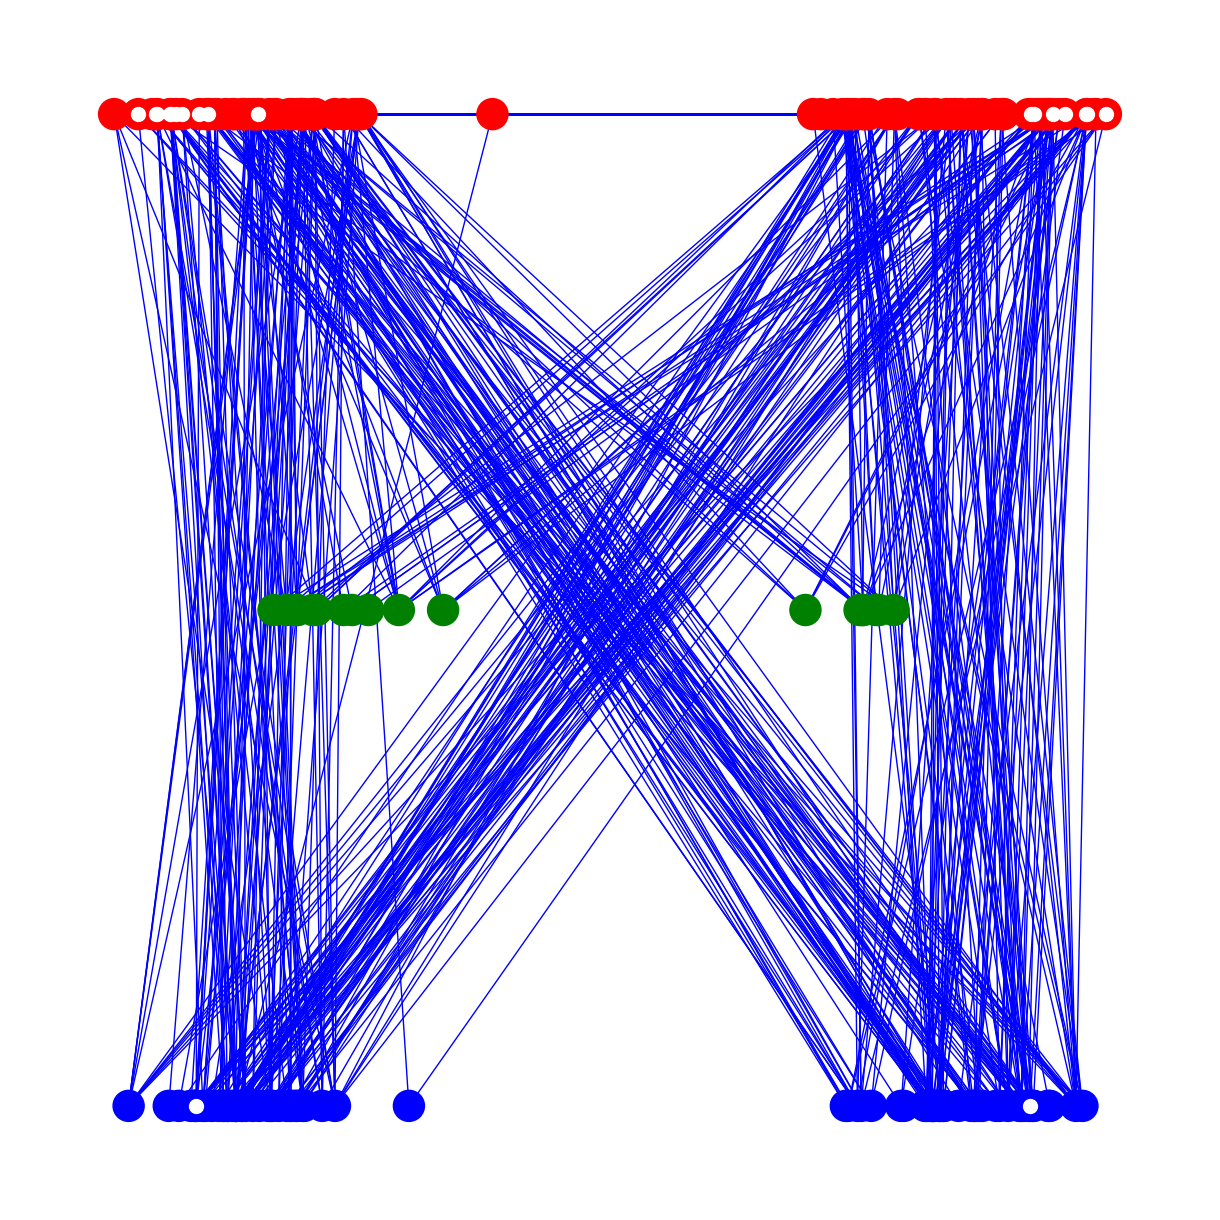

In [11]:
node_list = list(agents.keys())  # Assuming agent_id is what you use as nodes
positions = {agent_id: (agents[agent_id].opinions[0], agents[agent_id].currentStrategy.value) for agent_id in node_list}
edges = get_edges(agents)
colors = get_strategy_colors(node_list)

missing_ids = [agent_id for agent_id in agents if agent_id not in positions]
if missing_ids:
    print(f"Missing position entries for agent IDs: {missing_ids}")

# Overlay markers for stable agents


# Now, use these to draw the graph
G = nx.Graph()
G.add_nodes_from(node_list)  # Explicitly add nodes to ensure order
G.add_edges_from(edges)

# edge_colors = ['green' if agents[agent1_id].currentStrategy == Tolerance.MEDIUM else 'none' for agent1_id, agent2_id in G.edges()]

edge_colors = []
for agent1_id, agent2_id in G.edges():
    if agents[agent1_id].currentStrategy == Tolerance.HIGH:
        edge_colors.append('blue') # Nodes this node is connected too
    # elif agents[agent2_id].currentStrategy == Tolerance.MEDIUM:
    #     edge_colors.append('red') # Nodes connected to this one
    else :
        edge_colors.append('none')
# edge_colors = ['green' if agents[agent1_id].currentStrategy == Tolerance.LOW or agents[agent2_id].currentStrategy == Tolerance.LOW else 'none' for agent1_id, agent2_id in G.edges()]


plt.figure(figsize=(12, 12))
nx.draw(G, pos=positions, with_labels=False, node_size=500, node_color=colors, edge_color='none', font_size=10, font_weight="bold")
nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors)


stable_node_size = 100  # Smaller size for the overlay marker
for agent_id, agent in agents.items():
    if agent.is_strategy_stable():  # Assuming this function correctly determines stability
        if agent_id in positions:
            # Specify nodelist to contain only the current agent_id
            nx.draw_networkx_nodes(G, pos={agent_id: positions[agent_id]}, nodelist=[agent_id], node_size=stable_node_size, node_color='white')
        else:
            print(f"Missing position for agent ID: {agent_id}")

plt.show()


In [13]:
# Step 1: Generate a consistent node list from agents
node_list = list(agents.keys())  # Assuming agent_id is what you use as nodes

# Step 2: Generate positions using the consistent node list

# Step 3: Generate colors in the same order as the node list
strategy_colors = {
    Tolerance.LOW: 'blue',  # Strategy 0 -> Blue
    Tolerance.MEDIUM: 'green', # Strategy 1 -> Green
    Tolerance.HIGH: 'red'    # Strategy 2 -> Red
}
colors = [strategy_colors[agents[agent_id].currentStrategy] for agent_id in node_list]

